In [1]:
# allow plots to be interactive in the notebook
%matplotlib notebook

import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime

import os 
import sys
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [3]:
#inpath ='/cluster/work/users/rheinlender/breakup2013/outputs/breakup2013.ERA5.r10/'
#inpath ='/cluster/work/users/rheinlender/breakup2013/outputs/breakup2013.ERA5.r10_v2/'
#inpath ='/cluster/work/users/rheinlender/breakup2013/outputs/breakup2013.ERA5.r10.sticky_ice/'
#inpath ='/cluster/work/users/rheinlender/breakup2013/outputs/breakup2013.ERA5.r10.const_ice/'
inpath ='/cluster/work/users/rheinlender/breakup2013/outputs/breakup2013.ERA5.r10.Cair_0001_v2/Cw_00045/'
#inpath ='/cluster/work/users/rheinlender/breakup2013/outputs/breakup2013.ERA5.r10.Cair_0001/'

outpath_plots = '/cluster/work/users/rheinlender/plots/'

# get folder name
prefix = os.path.basename(os.path.normpath(inpath))
print(prefix)

fl = sorted(glob(inpath+'Moorings_2013m*.nc'))

# Open multiple nc files
ds = xr.open_mfdataset(fl)

# Select data in Jan-Mar
#subset = ds.sel(time=slice('2013-01-01', '2013-03-31'))


# get daily time array
date=ds['time'].groupby('time.dayofyear').mean()
ds

Cw_00045


<xarray.Dataset>
Dimensions:                   (nv: 2, time: 174, x: 782, y: 651)
Coordinates:
  * time                      (time) datetime64[ns] 2013-01-04T06:00:00 ... 2...
Dimensions without coordinates: nv, x, y
Data variables:
    Polar_Stereographic_Grid  (time) int32 -2147483647 ... -2147483647
    time_bnds                 (time, nv) datetime64[ns] dask.array<chunksize=(56, 2), meta=np.ndarray>
    longitude                 (time, y, x) float32 dask.array<chunksize=(56, 651, 782), meta=np.ndarray>
    latitude                  (time, y, x) float32 dask.array<chunksize=(56, 651, 782), meta=np.ndarray>
    siu                       (time, y, x) float32 dask.array<chunksize=(56, 651, 782), meta=np.ndarray>
    siv                       (time, y, x) float32 dask.array<chunksize=(56, 651, 782), meta=np.ndarray>
    sic                       (time, y, x) float32 dask.array<chunksize=(56, 651, 782), meta=np.ndarray>
    sit                       (time, y, x) float32 dask.array<chunksize=(56, 651, 782), meta=np.ndarray>
    snt                       (time, y, x) float32 dask.array<chunksize=(56, 651, 782), meta=np.ndarray>
    fyi_fraction              (time, y, x) float32 dask.array<chunksize=(56, 651, 782), meta=np.ndarray>
    sit_thin                  (time, y, x) float32 dask.array<chunksize=(56, 651, 782), meta=np.ndarray>
    hfos                      (time, y, x) float32 dask.array<chunksize=(56, 651, 782), meta=np.ndarray>
    hfs                       (time, y, x) float32 dask.array<chunksize=(56, 651, 782), meta=np.ndarray>
    sia                       (time, y, x) float32 dask.array<chunksize=(56, 651, 782), meta=np.ndarray>
    sfo                       (time, y, x) float32 dask.array<chunksize=(56, 651, 782), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    institution:  NERSC, Thormoehlens gate 47, N-5006 Bergen, Norway
    source:       neXtSIM model fields

<IPython.core.display.Javascript object>


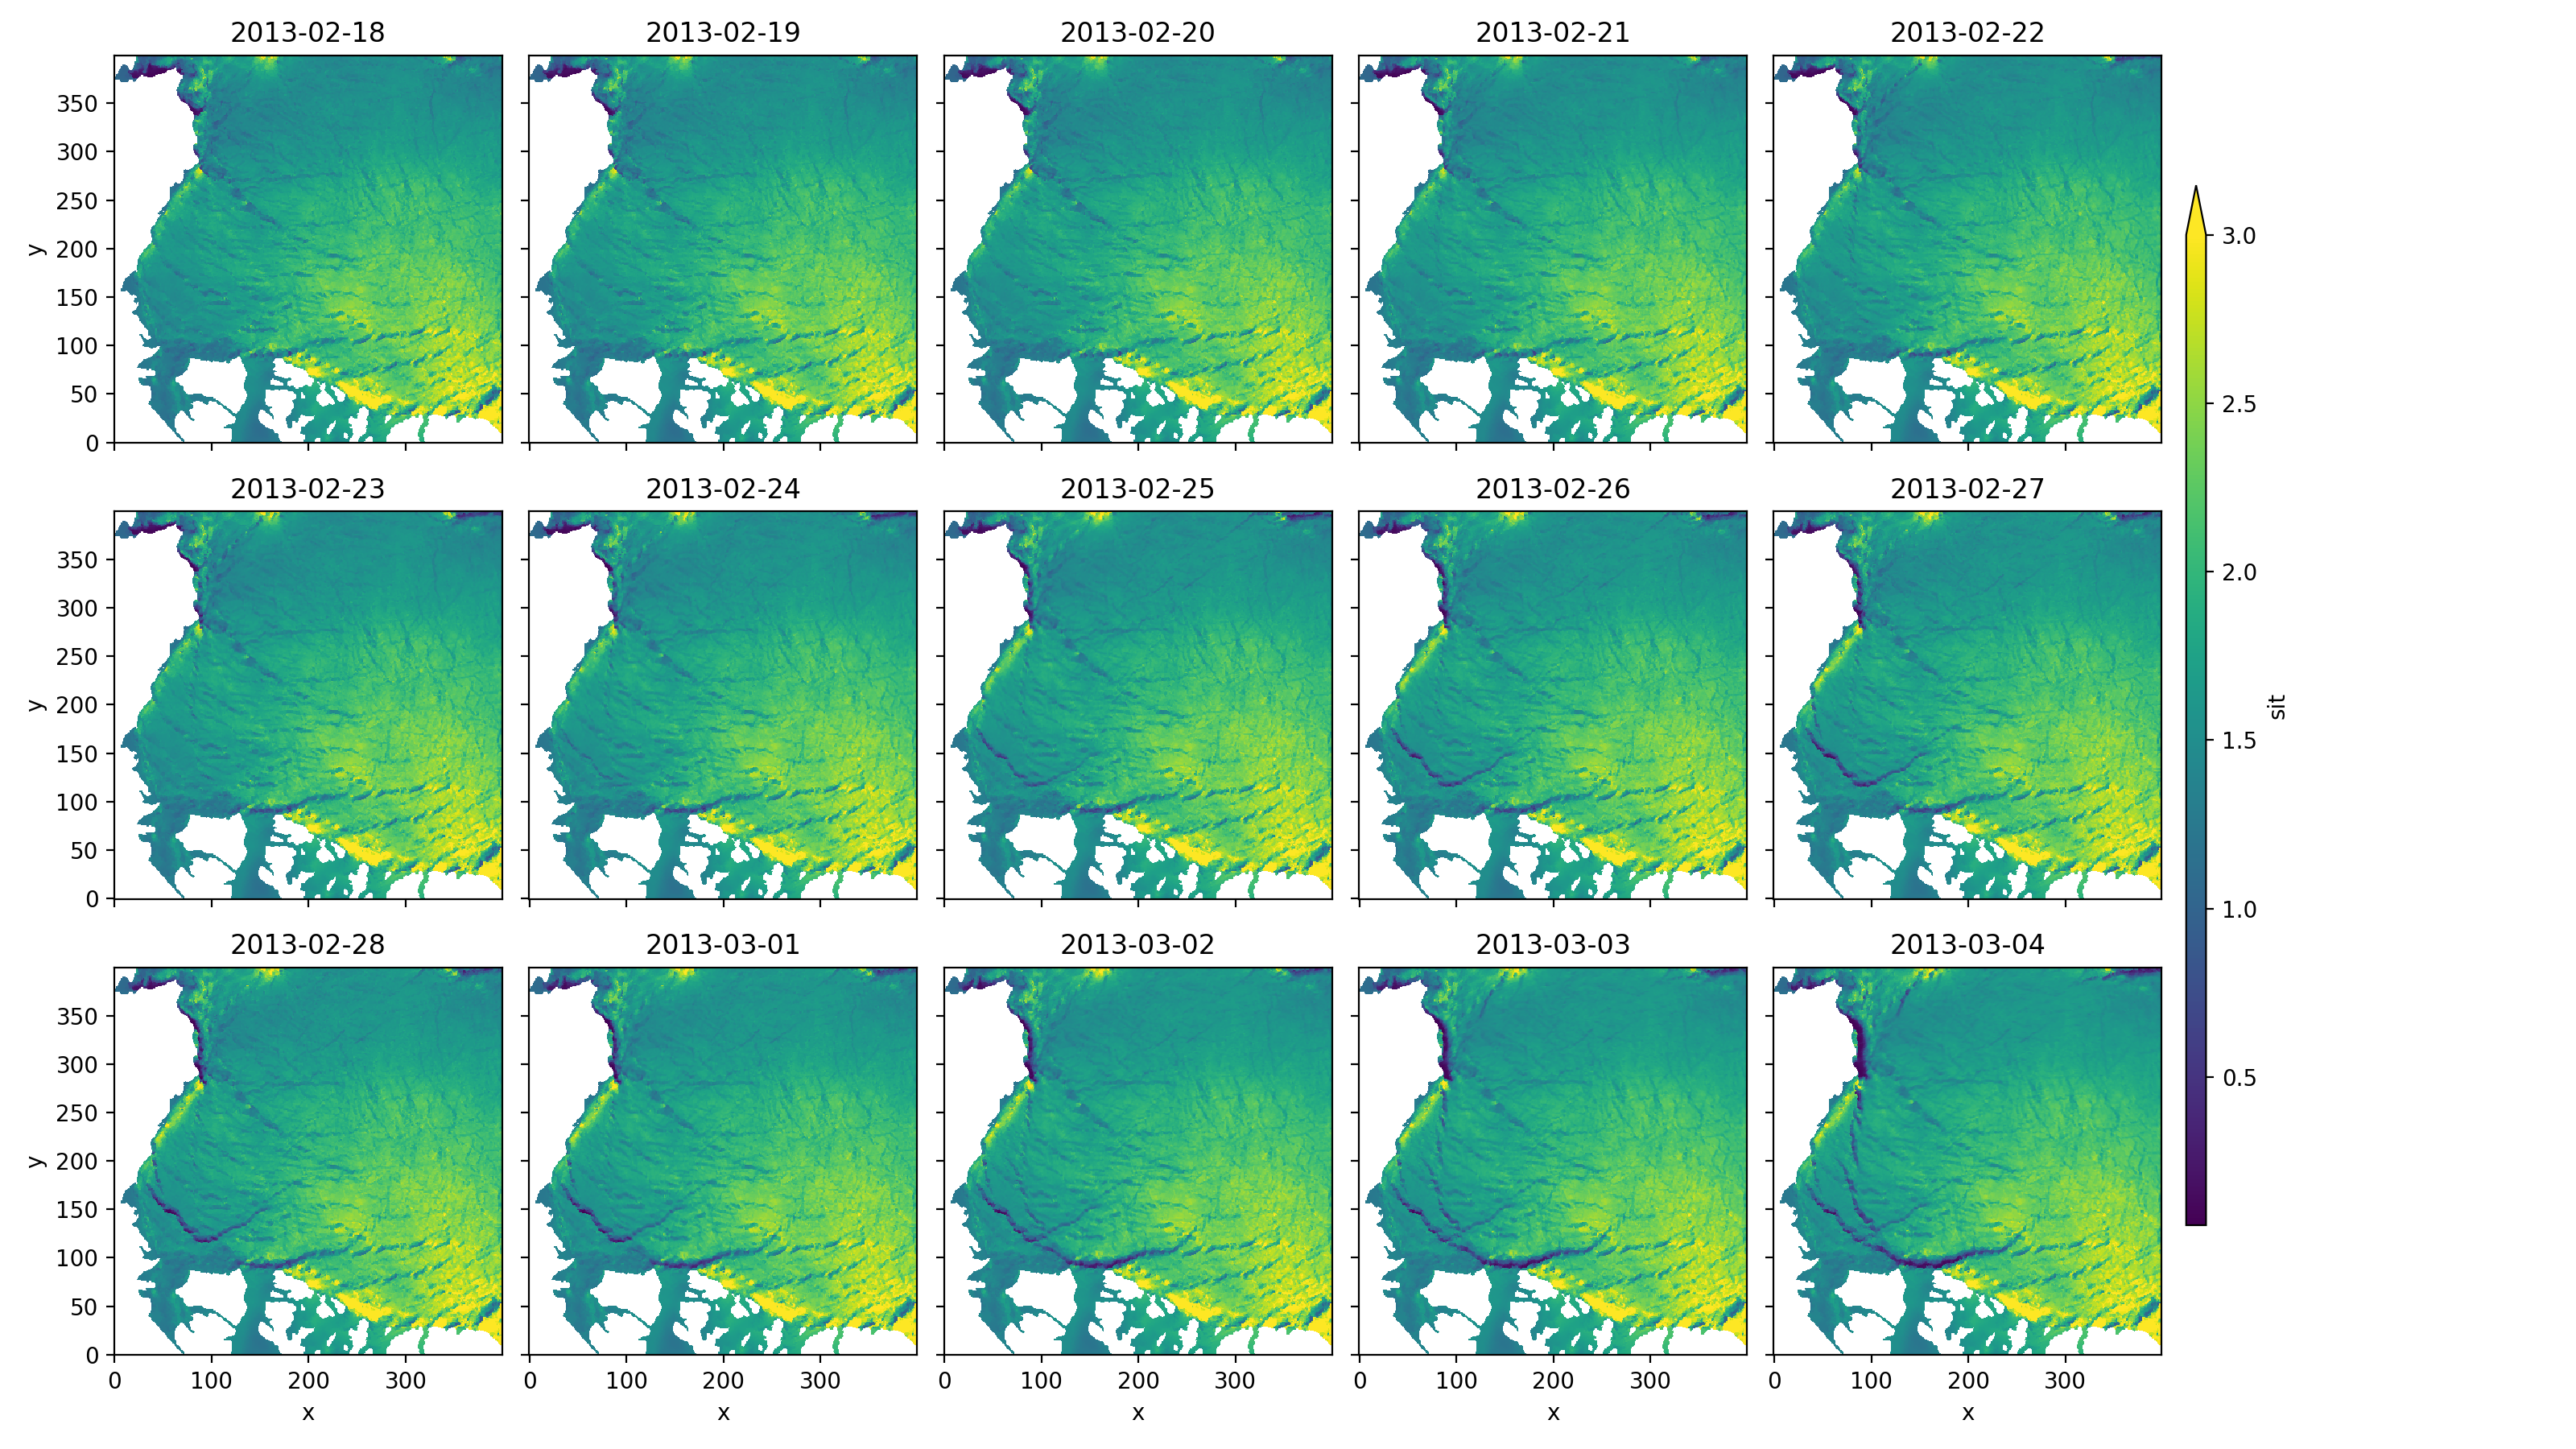

In [4]:


sit_sel=ds.sit.sel(time=slice('2013-02-18','2013-03-04'), x=ds.x < 400, y = slice(100,500))

# get daily time array
date=sit_sel['time'].groupby('time.dayofyear').mean()

# compute daily SIT from 3-hour interval 
sit_daily = sit_sel.groupby('time.dayofyear').mean(dim='time', skipna=False)
#sit_daily=sit_daily.transpose()

fg = sit_daily.plot.imshow(col='dayofyear', col_wrap=5, vmax=3, cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.8,
        "aspect": 50,
        "pad": 0.01,
    })

# change titles
for i, ax in enumerate(fg.axes.flat):
    title = str(date[i].values)[:10]
    ax.set_title(title)

figname ='sit_BeaufortSea_20130218-20130304_'+prefix+'.png'    
plt.savefig( outpath_plots+figname, dpi=150, bbox_inches='tight')

In [ ]:
plt.savefig(outpath_plots+'sit_BeaufortSea_20130218-20130304_nextsim.r10.era5.Cair_0001.png',
            bbox_inches='tight')

In [ ]:
# Plot sea ice velocity 

data = ds.sel(time=slice('2013-02-18','2013-03-04'), x=ds.x < 400, y = slice(100,500))

# get daily time array
dates = data['time'].groupby('time.dayofyear').mean()

# compute ice speed 
u = data.siu.groupby('time.dayofyear').mean(dim='time', skipna=False)
v = data.siv.groupby('time.dayofyear').mean(dim='time', skipna=False)

ice_vel = np.hypot(u,v)


In [ ]:

fg = ice_vel.plot.imshow(col='dayofyear', col_wrap=5, cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.8,
        "aspect": 50,
        "pad": 0.01,
    })

# change titles
for i, ax in enumerate(fg.axes.flat):
    title = str(dates[i].values)[:10]
    ax.set_title(title)